In [1]:
import pandas as pd
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
recipes = pd.read_csv('/Users/giovannimaya/Downloads/epi_r-1 (1).csv')
recipes.head()


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
numeric_cols = recipes.select_dtypes(include=['number']).columns
medians = recipes[numeric_cols].median()
updated_recipes = recipes[numeric_cols].fillna(medians)
updated_recipes

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,331.0,8.0,17.0,294.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


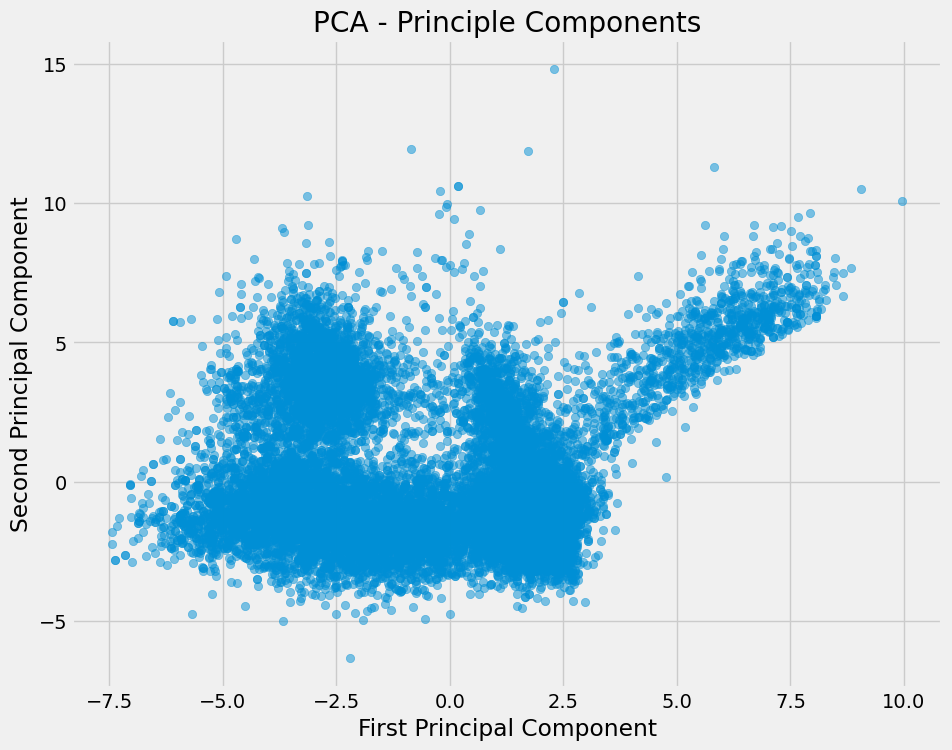

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_recipes = scaler.fit_transform(updated_recipes.select_dtypes(include=['number']))
pca = PCA()
pca.fit(scaled_recipes)
pca_data = pca.transform(scaled_recipes)
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA - Principle Components")
plt.grid(True)
plt.show()

In [18]:
explain_var = pca.explained_variance_ratio_
cumul_var = np.cumsum(explain_var)
explain_var, cumul_var

(array([1.10036680e-02, 9.02986087e-03, 7.30478109e-03, 5.44856939e-03,
        5.32370481e-03, 4.82056500e-03, 4.39457853e-03, 4.01573565e-03,
        3.82223128e-03, 3.65997397e-03, 3.60683656e-03, 3.49033593e-03,
        3.41173479e-03, 3.38061801e-03, 3.33661293e-03, 3.28847282e-03,
        3.17222025e-03, 3.12548646e-03, 3.08693027e-03, 3.03721050e-03,
        3.01897039e-03, 2.97740720e-03, 2.93885481e-03, 2.89554235e-03,
        2.84736456e-03, 2.79682349e-03, 2.79503357e-03, 2.76517875e-03,
        2.75002328e-03, 2.72848322e-03, 2.71234245e-03, 2.69331521e-03,
        2.67009477e-03, 2.65525275e-03, 2.64338773e-03, 2.59979996e-03,
        2.59385178e-03, 2.57542649e-03, 2.56951157e-03, 2.55597800e-03,
        2.53542607e-03, 2.52840968e-03, 2.49610829e-03, 2.48215957e-03,
        2.46884946e-03, 2.45780005e-03, 2.44643770e-03, 2.43560647e-03,
        2.42573187e-03, 2.42368245e-03, 2.41542528e-03, 2.40421782e-03,
        2.39276015e-03, 2.38886981e-03, 2.36065220e-03, 2.354262

In [19]:
## --- END OF Q1 ----

In [20]:
## ---- START OF Q2 ---- 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [24]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, recipes['cake'], test_size=0.3, random_state=42)
params = {'C': np.logspace(-4, 4, 20)}
log_reg = LogisticRegression(penalty='l1', solver='liblinear')
clf = GridSearchCV(log_reg, params, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)
opt_c = clf.best_params_['C']
best_auc = clf.best_score_
print(f'Optimal C: {opt_c}')
print(f'Best AUC score: {best_auc}')

Optimal C: 4.281332398719396
Best AUC score: 0.9999928787562787


In [26]:
y_pred = clf.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred)
print(f'Test score AUC: {test_auc}')

Test score AUC: 0.9992607897742586


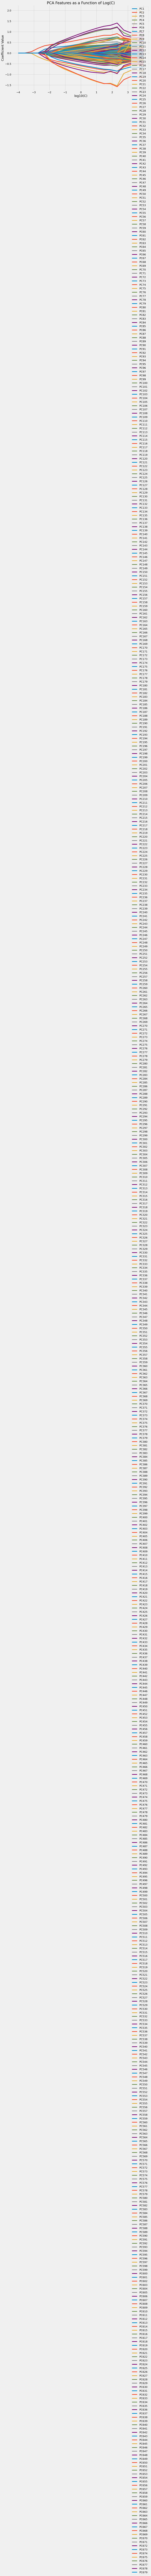

In [27]:
coeffs = []
cs = np.logspace(-4, 4, 20)
for c in cs:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train, y_train)
    coeffs.append(lr.coef_[0])
coeffs = np.array(coeffs)
plt.figure(figsize=(12, 8))
for i in range(coeffs.shape[1][:7]):
    plt.plot(np.log10(cs), coeffs[:, i], label=f'PC{i + 1}')
plt.title("PCA Features as a Function of Log(C)")
plt.ylabel('Coefficient Value')
plt.xlabel('log10(C)')
plt.legend()
plt.show()
